In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import collections

<h1 style="color:#00bbae">Veri Seti </h1>
<span>anime.csv,rating.csv </span>
<p>Veri  seti <a href="https://myanimelist.net">myanimelist.net</a> üzerinden animeler ve animelerin özelliklerini ile kullanıcıların hangi animelere kaç puan verdiğini içeriyor </p>
<span>anime.csv içeriği</span>
<ol> 
  <li>anime_id</li>
  <li>name </li>
  <li>genre </li>
  <li>type </li>
  <li>episodes </li>
  <li>rating </li>
  <li>members </li>
</ol>
<hr>
<span>rating.csv içeriği</span>
<ol> 
  <li>user_id</li>
  <li>anime_id </li>
  <li>rating </li>
</ol>


In [2]:
anime=pd.read_csv("anime.csv")   #Dosya Okuma
rating=pd.read_csv("rating.csv")

<p>Okuduğumuz Veri Çerçevelerini Kontrol edelim</p>

In [3]:
anime.head(4) 

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572


In [4]:
rating.head(4)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1


<p>Elimizdeki Datayı Biraz Düzenleyelim </p>

In [5]:
print(anime.info())
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [6]:
print(anime.isnull().sum())
#null yada NaN değer var mı bakıyoruz 
print(rating.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


<p>Excel Dosyasına bakarken rating dosyasında bazı kullanıcıların -1 girdiğini gördüm ve bunları silme kararı verdim
   Anime dosyasında ise bazı animelerin bölüm sayıları bilinmiyor olarak gözükmüş aşağıda yapcağım analiz kısımlarında problem olmasın diye onları da sildim
 </p>

In [7]:
rating_df=rating.replace(to_replace=-1,value=np.NaN)
anime_df=anime.replace(to_replace="Unknown",value=np.NaN) 

In [8]:
anime_df.dropna(how="any",axis=0,inplace=True)
rating_df.dropna(how="any",axis=0,inplace=True)

#Tekrardan boş değer var mı kontrol ediyorum
print(anime_df.isnull().sum())
print(rating_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


In [9]:
anime_df=anime_df.astype({"episodes":int}) #episodes "Unknown" değerler yüzünden object olarak tanımlanmıştı bunun türünü int olarak değiştiriyorum 

In [10]:
#Elimizdeki verinin Büyüklüğünü bakıyorum
print(anime_df.shape)
print(rating_df.shape)

(11830, 7)
(6337241, 3)


<h1 style="color:#00bbae">Analiz Kısmı</h1>

<h4> Veriye Sorabileceğimiz sorular nelerdir? <h4>
<ol>
  <li>Derecelendirme ve Tip Arasındaki İlişki nasıl? </li>
  <li>Tipe göre ortalama değerleri ve standart sapmaları nedir? </li>
  <li>Tür dağılımı nasıl? </li>
  <li>Ne kadar insan anime değerlendiriyor?</li>
  <li>Rating oranları oy kullanan insan sayısı ile nasıl bir orantıya sahip? </li>
  <li>Rating oranları bölüm sayıları ile nasıl bir orantıya sahip? </li>

<h5> Derecelendirme ve Tip Arasındaki İlişki <h5>

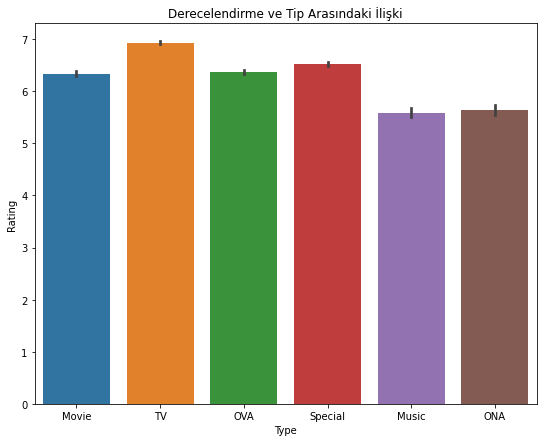

In [11]:
plt.figure(figsize = (9,7))
sns.barplot(data = anime_df, x = "type", y = "rating")
plt.title("Derecelendirme ve Tip Arasındaki İlişki", size = 12)
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

In [12]:
anime_ax=anime_df.groupby(by="type").apply(lambda x:[x["members"].mean(),x["members"].std(),x["rating"].mean(),x["rating"].std()]).apply(pd.Series)
anime_ax.columns=["ortalama.people","standartSapma.people","ortalama.rating","standartSapma.rating"]
anime_ax

,ortalama.people,standartSapma.people,ortalama.rating,standartSapma.rating
type,,,,
Movie,10568.609832,31393.230487,6.334486,1.207021
Music,1314.455852,4552.445070,5.588665,0.959398
ONA,4449.237624,12876.855839,5.640479,1.125504
OVA,6065.670364,15162.589122,6.371087,0.859524
Special,7709.295495,15591.015211,6.525453,0.884138
TV,44635.572029,90545.430554,6.929487,0.830774


<h5> Animelerin Tür Dağılımı </h5>

In [13]:
#Kaç tane tür bulmak için 
for item in list(anime_df["genre"].index):
    anime_df.loc[item, "genre"] = anime_df.loc[item, "genre"] + ","
tür=[]
for items in anime_df["genre"].sum().split(","):
    tür.append(items.strip()) #strip yapmamız sebebi önceki denememde bazı Türlerin başlarında boşluk oluyordu ve aynı türden 2 tane sayım gözüküyordu 

#Yukarda elde ettiğimiz dizide türler dağınıktır yani aynı türden birden fazla vardır bunları ayıklayıp sayılarını elde etmemiz gerek 

counter =collections.Counter(tür) 

tür_dict=dict(sorted(dict(counter).items(), key=lambda item: item[1], reverse = True))
tür_df=pd.Series(data=tür_dict)

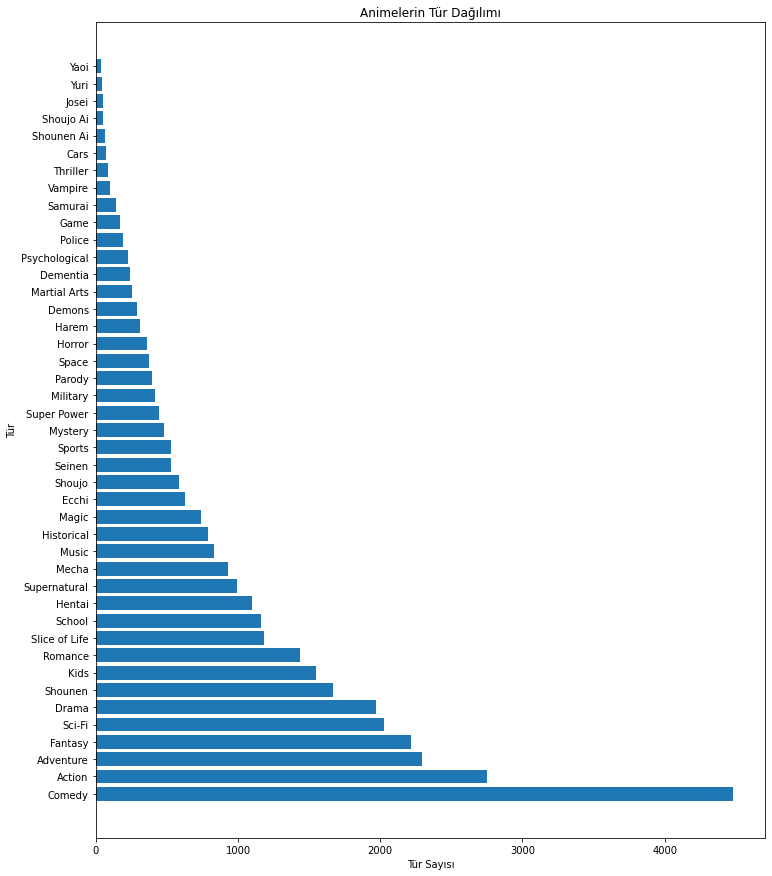

In [14]:
tür_df.drop(labels="",inplace=True)
plt.figure(figsize=(12,15))
plt.barh(tür_df.index,tür_df.values)
plt.title("Animelerin Tür Dağılımı")
plt.ylabel("Tür")
plt.xlabel("Tür Sayısı")
plt.show()

<h5> İnsanlar ne kadar anime değerlendiriyor  </h5>

<AxesSubplot:ylabel='Density'>

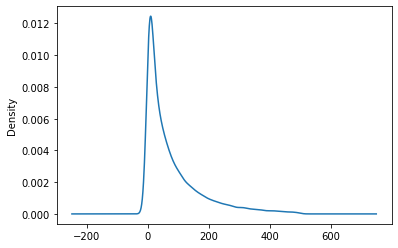

In [15]:
rate=rating_df.groupby(by="user_id")["rating"].count()
rate[rate<500].plot.kde()  #Yoğunluk oranı için 

<h4>Rating oranları  web sitesindeki rating ile elimizdeki rating tablosundaki oranlar </h4>


(array([  16649.,   23150.,   41453.,  104291.,  282806.,  637775.,
        1375287., 1646019., 1254096.,  955715.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

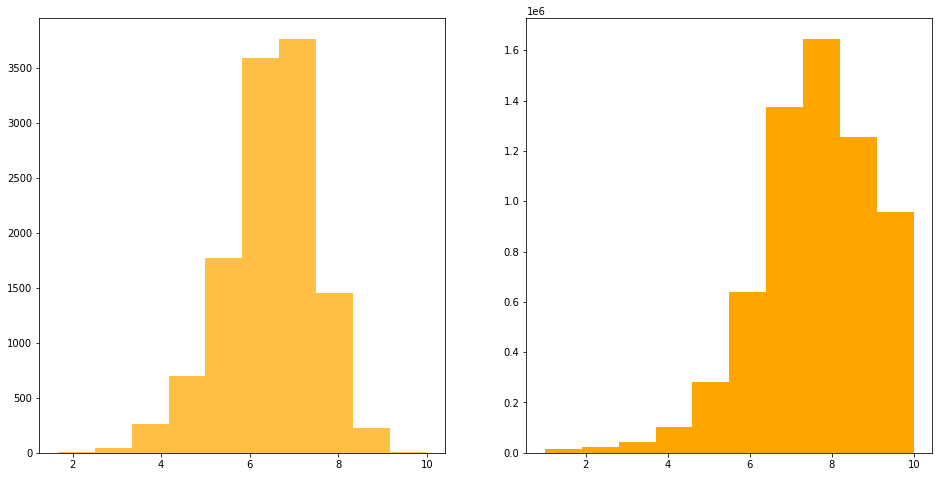

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.hist(data=anime_df,x="rating",color="#ffbf47") 

plt.subplot(1,2,2)
plt.hist(data=rating_df,x="rating",color="orange") 

<h4> Kişi sayısına göre rating oranların değişimi </h4>

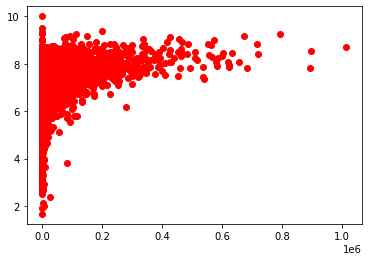

In [17]:
plt.scatter(data=anime_df,x="members",y="rating",c="red")

Text(0.5, 1.0, 'Movie')

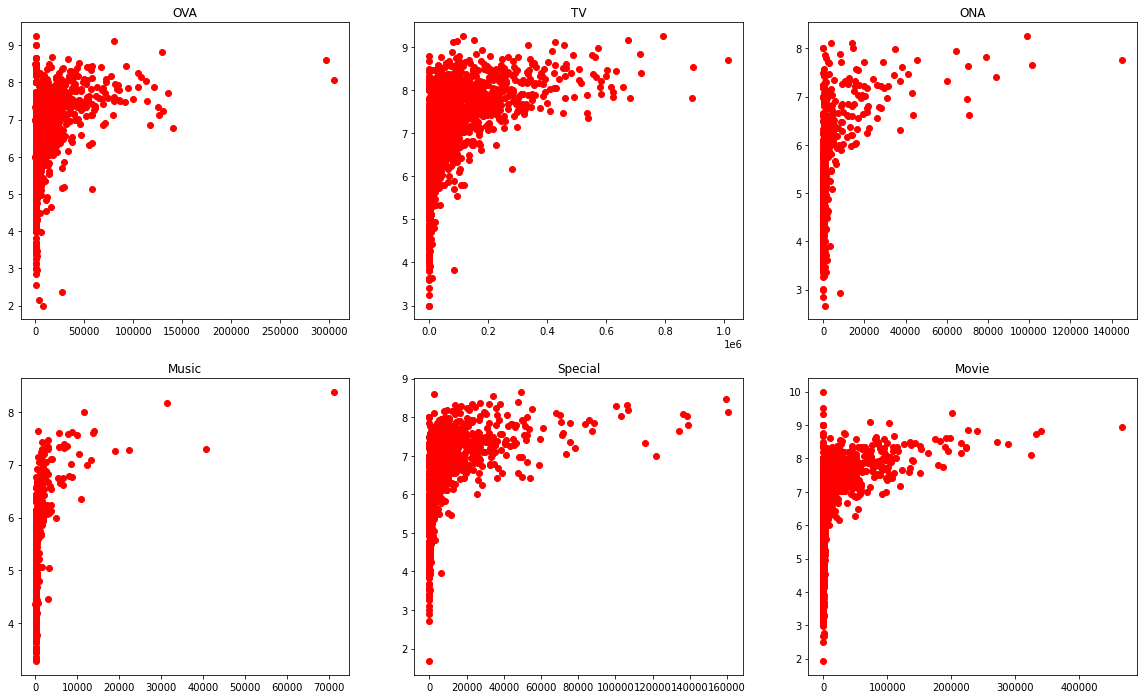

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.scatter(data=anime_df[anime_df["type"]=="OVA"],x="members",y="rating",c="red")
plt.title("OVA")

plt.subplot(2,3,2)
plt.scatter(data=anime_df[anime_df["type"]=="TV"],x="members",y="rating",c="red")
plt.title("TV")

plt.subplot(2,3,3)
plt.scatter(data=anime_df[anime_df["type"]=="ONA"],x="members",y="rating",c="red")
plt.title("ONA")

plt.subplot(2,3,4)
plt.scatter(data=anime_df[anime_df["type"]=="Music"],x="members",y="rating",c="red")
plt.title("Music")

plt.subplot(2,3,5)
plt.scatter(data=anime_df[anime_df["type"]=="Special"],x="members",y="rating",c="red")
plt.title("Special")

plt.subplot(2,3,6)
plt.scatter(data=anime_df[anime_df["type"]=="Movie"],x="members",y="rating",c="red")
plt.title("Movie")

<h4>Bölüm Sayısına göre rating oranlarının değişimi <h4>

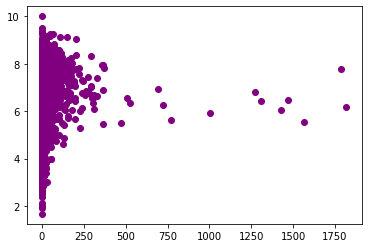

In [19]:
plt.scatter(data=anime_df,x="episodes",y="rating",c="purple")

Text(0.5, 1.0, 'Movie')

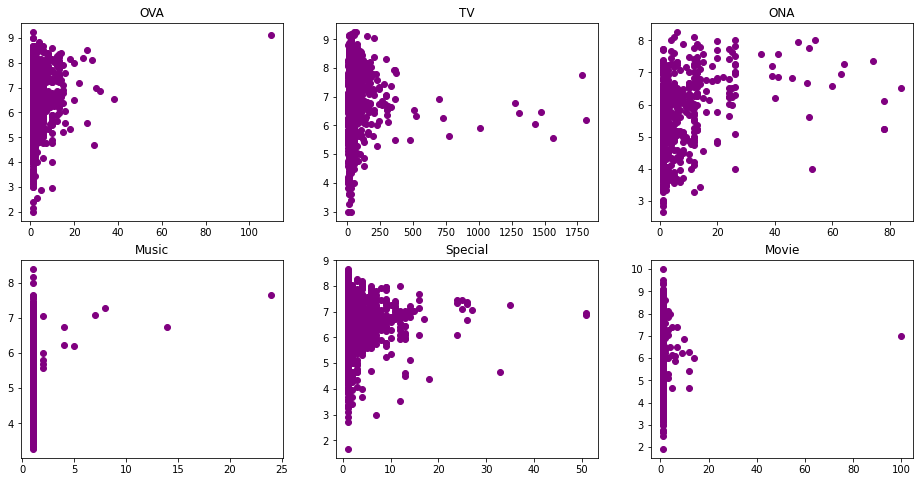

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(data=anime_df[anime_df["type"]=="OVA"],x="episodes",y="rating",c="purple")
plt.title("OVA")

plt.subplot(2,3,2)
plt.scatter(data=anime_df[anime_df["type"]=="TV"],x="episodes",y="rating",c="purple")
plt.title("TV")

plt.subplot(2,3,3)
plt.scatter(data=anime_df[anime_df["type"]=="ONA"],x="episodes",y="rating",c="purple")
plt.title("ONA")

plt.subplot(2,3,4)
plt.scatter(data=anime_df[anime_df["type"]=="Music"],x="episodes",y="rating",c="purple")
plt.title("Music")

plt.subplot(2,3,5)
plt.scatter(data=anime_df[anime_df["type"]=="Special"],x="episodes",y="rating",c="purple")
plt.title("Special")

plt.subplot(2,3,6)
plt.scatter(data=anime_df[anime_df["type"]=="Movie"],x="episodes",y="rating",c="purple")
plt.title("Movie")


<h1 style="color:#00bbae">Öneri Sistemi </h1>

<h3 style="color:rgb(139, 211, 243)">Öneri Sistemleri Nedir </h3>
<p>Bir kullanıcının tercihlerini tahmin etmeye dayanan sistemlerdir örnek verirsek bir müşterinin ilgilenebileceği elektronik ürünleri bulmak veya izlemek isteyebileceği filmleri bulup onun karşısına çıkarmak</p>
<span>Öneri Sistemlerinde bir sürü sistem vardır benim kullandığım algoritmalar: </span>
<ol>
  <li>Collabrotiv Filtering </li>
  <li>Content-Based Filtering</li>
</ol>
<img src="öneri.png" style="width:600px; height:400px;"  />
<hr>
<a href="https://medium.com/@irmcilingir/öneri-sistemleri-recommendation-systems-28a3f341c0a9">Kaynak</a>

<h4 style="color:rgb(139, 211, 243)"> Collaborativ Filtering </h4>
<p>
  Bunu en kısa özetle anlatmak gerekirse senle aynı kitab,film veya elektronik bir ürünü beğenmiş olan başka bir kullanıcının  beğendiği ürünleri senin karşına çıkarması diyebiliriz . bunun ana fikri ikinizin ortak alanlarının yoğunluğu yüksek ise diğer arkadaşın beğendiği yada aldığı ürünü senin de alma olasılığının yüksek olabileceği düşüncesiyle çalışır 
</p>

In [21]:
from sklearn.decomposition import TruncatedSVD #buna gerek duyma sebebim 

In [22]:
anime_full_data=pd.merge(rating,anime,on="anime_id")
anime_full_data

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


In [23]:
anime_full_data.groupby("anime_id")["rating_x"].count().sort_values(ascending=False).head()

anime_id
1535     39340
11757    30583
16498    29584
1575     27718
226      27506
Name: rating_x, dtype: int64

In [24]:
anime_full_data["rating_x"].replace(to_replace=-1,value=np.NaN,inplace=True)

In [25]:
anime_full_data["rating_x"].dropna(axis=0,how=any)

1           8.0
2           6.0
5           8.0
6           9.0
7           9.0
           ... 
7813720     7.0
7813721     7.0
7813722     8.0
7813723    10.0
7813726     4.0
Name: rating_x, Length: 6337239, dtype: float64

In [26]:
rating_crosstab=anime_full_data.pivot_table(values="rating_x",index="user_id",columns="name")


In [27]:
rating_crosstab

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rating_crosstab.shape

(69600, 9926)

In [29]:
X=rating_crosstab.T

In [30]:
X.replace(to_replace=np.NaN,value=0,inplace=True) #TruncatedSVD için NaN değerleri 0 yapıyorum 

In [31]:
 #burada PCA da kullanabilirdim ama internetten baktığım kadarıyla SVD matrisi işlemesi ve analiz etmesi kolay ve daha özenli 
SVD=TruncatedSVD(n_components=16,random_state=17)
resultan_matrix=SVD.fit_transform(X) 
resultan_matrix.shape

(9926, 16)

In [32]:
# elde ettiğimiz matrisin korelasyon kat sayılarını alıyoruz
cor_mat=np.corrcoef(resultan_matrix)
cor_mat.shape

(9926, 9926)

In [33]:
movie_names=rating_crosstab.columns 
movie_list=list(movie_names)

In [34]:
def CollaborativeFiltering(movie):
    movieid=movie_list.index(movie)
    corr_movie=cor_mat[movieid]
    recom_movie=list(movie_names[(corr_movie<1.0) & (corr_movie > 0.85)])
    return anime.loc[anime['name'].isin(recom_movie)]

In [35]:
CollaborativeFiltering("Naruto")

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
288,6702,Fairy Tail,"Action, Adventure, Comedy, Fantasy, Magic, Sho...",TV,175,8.22,584590
582,269,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",TV,366,7.95,624055
803,154,Shaman King,"Action, Adventure, Comedy, Drama, Shounen, Sup...",TV,64,7.83,169517


In [36]:
CollaborativeFiltering("Neon Genesis Evangelion") #favorimdir öneririm netflixde var 

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962
75,801,Ghost in the Shell: Stand Alone Complex 2nd GIG,"Action, Mecha, Military, Mystery, Police, Sci-...",TV,26,8.57,113993
90,3784,Evangelion: 2.0 You Can (Not) Advance,"Action, Mecha, Sci-Fi",Movie,1,8.53,182224
104,205,Samurai Champloo,"Action, Adventure, Comedy, Historical, Samurai...",TV,26,8.50,390076
116,467,Ghost in the Shell: Stand Alone Complex,"Action, Mecha, Military, Police, Sci-Fi, Seinen",TV,26,8.47,194491
130,32,Neon Genesis Evangelion: The End of Evangelion,"Dementia, Drama, Mecha, Psychological, Sci-Fi",Movie,1,8.45,215630
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
191,43,Ghost in the Shell,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Movie,1,8.34,223036
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069


<h4 style="color:rgb(139, 211, 243)">Content-Based Filtering Systems </h4>
<p>
  Müşterinin aldığı yada beğendiği ürünün benzer özellikteki ürünleri müşterinin karşısına çıkarmak için kullanılıyor .İçeriğe Dayalı Filtreleme fikri, bir ürünü beğendiyseniz bu ürüne benzer başka bir ürünü de beğeneceğinize dayanmaktadır. 
</p>

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [38]:
# gereksiz verileri temizleme işlemi
anime_df=anime.dropna(axis=0,how="any")
anime_df["rating"].replace(to_replace="Unknown",value=0)
anime_df["rating"].replace(to_replace=-1,value=0)
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


<strong style="color:rgb(139, 211, 243)">TF-IDF Nedir? </strong>
<p> TF-IDF kavramı IR (information retrieval, bilgi getirimi) gibi konuların altında bir sıralama (ranking) algoritması olarak sıkça geçmektedir.

İngilizcedeki Term Frequency – Inverse Document Frequency (Terim frekansı – ters metin frekansı) olarak geçen kelimelerin baş harflerinden oluşan terim basitçe bir metinde geçen terimlerin çıkarılması ve bu terimlerin geçtiği miktara göre çeşitli hesapların yapılması üzerine kuruludur.

Klasik olarak TF yani terimlerin kaç kere geçtiğinden daha iyi sonuç verir. Kısaca TF-IDF hesabı sırasında iki kritik sayı bulunmaktadır. Bunlardan birincisi o anda ele alınan dokümandaki terimin sayısı diğeri ise bu terimi külliyatta içeren toplam doküman sayısıdır. </p>
<a href="https://bilgisayarkavramlari.com/2012/10/22/tf-idf/">Kaynak</a>
<hr>
<img src="indir.png" style="width:600px" />

In [39]:

tfvector=TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english') 

In [40]:
anime_df["genre"]=anime_df["genre"].fillna("")
genre_str=anime_df["genre"].str.split(",").astype(str)
tf_matrix=tfvector.fit_transform(genre_str)

C:\Users\Baki\AppData\Local\Temp/ipykernel_18568/1768393245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df["genre"]=anime_df["genre"].fillna("")


In [41]:
tf_matrix.shape

(12017, 1547)

In [47]:
linear_k = linear_kernel(tf_matrix, tf_matrix)
linear_k

array([[1.        , 0.02301622, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02301622, 1.        , 0.0253986 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0253986 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [43]:
endeks = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates() #indis numaralarını almak için 
print("örnek",endeks["Naruto"])  

örnek 841


In [51]:
def ContentBasedFiltering(title, linear_k=linear_k):
    #Kullanıcının Girdiği filmin indexi 
    idx = endeks[title]

    # Benzerlik puanlarını alıyoruz ikili örnek :(id,score)
    linear_k_scores = list(enumerate(linear_k[idx]))

    # yüksek skorları tespit etmek için bir sıralama işleminden geçiriyoruz 
    linear_k_scores = sorted(linear_k_scores, key=lambda x: x[1], reverse=True)

    # burada en yüksek 10 skoru alıyorum 
    linear_k_scores = linear_k_scores[1:11]

    #  burada yukarıda ikili olarak aldımız puanların indislerini ayırıyoruz 
    anime_indices = [i[0] for i in linear_k_scores]

    # çıktı
    return anime.iloc[anime_indices]
    # return pd.DataFrame({'Anime name': anime_df['name'].iloc[anime_indices].values,
    #                              'Rating': anime_df['rating'].iloc[anime_indices].values})

In [52]:
ContentBasedFiltering("Naruto")

,anime_id,name,genre,type,episodes,rating,members
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1103,32365,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.68,16868
1343,10075,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,1,7.58,23465
1472,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.53,84527
1573,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,7.50,83515
2458,19511,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,1,7.26,13014
2996,6946,Mudazumo Naki Kaikaku: The Legend of Koizumi,"Comedy, Game, Parody, Seinen",OVA,3,7.11,8682
7819,8604,Oshiri Kajiri Mushi,"Comedy, Music",Music,1,4.93,495
7617,21833,Higenashi Gogejabaru,"Comedy, Fantasy, Kids, Music",Music,1,5.23,149


In [53]:
ContentBasedFiltering("Bleach")

,anime_id,name,genre,type,episodes,rating,members
946,8247,Bleach Movie 4: Jigoku-hen,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.75,94074
1131,4835,Bleach Movie 3: Fade to Black - Kimi no Na wo ...,"Action, Comedy, Shounen, Super Power, Supernat...",Movie,1,7.66,122373
175,1604,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",TV,203,8.37,258103
2932,12321,Thermae Romae,"Comedy, Historical, Seinen",TV,3,7.13,13444
3925,2811,Soratobu Yuureisen,"Adventure, Drama, Mecha, Sci-Fi",Movie,1,6.85,2634
3982,30379,Nagato Yuki-chan no Shoushitsu: Owarenai Natsu...,"Comedy, Seinen, Slice of Life",OVA,1,6.83,9773
3287,10431,Baka to Test to Shoukanjuu: Matsuri - Sentaku ...,"Comedy, Parody",ONA,1,7.03,18934
3023,2389,Kagaku Ninja-tai Gatchaman,"Action, Adventure, Sci-Fi, Shounen",TV,105,7.10,4802
4783,684,Tenshi no Shippo Chu!,"Fantasy, Magic, Romance",TV,11,6.64,3674
859,16011,Tokyo Ravens,"Comedy, School, Shounen, Super Power, Supernat...",TV,24,7.80,171384
